<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/horse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/horse.csv")

In [3]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [4]:
for i in range(len(df.columns)):
  if((df[df.columns[i]].dtype == 'int64') or (df[df.columns[i]].dtype == 'float64')):
    df[df.columns[i]] = df[df.columns[i]].replace(np.nan,df[df.columns[i]].mean())

In [5]:
for i in range(len(df.columns)):
  if(df[df.columns[i]].dtype == 'object'):
    df[df.columns[i]] = df[df.columns[i]].replace(np.nan,df[df.columns[i]].value_counts().index[0])

In [6]:
pd.DataFrame((df.isna().sum()))

,0
surgery,0
age,0
hospital_number,0
rectal_temp,0
pulse,0
respiratory_rate,0
temp_of_extremities,0
peripheral_pulse,0
mucous_membrane,0
capillary_refill_time,0


In [7]:
df['surgery'] =  LabelEncoder().fit_transform(df['surgery'])
df['age'] =  LabelEncoder().fit_transform(df['age'])
df['outcome'] =  LabelEncoder().fit_transform(df['outcome'])
df['surgical_lesion'] =  LabelEncoder().fit_transform(df['surgical_lesion'])
df['cp_data'] =  LabelEncoder().fit_transform(df['cp_data'])
df['abdomo_appearance'] =  LabelEncoder().fit_transform(df['abdomo_appearance'])
df['abdomen'] =  LabelEncoder().fit_transform(df['abdomen'])
df['temp_of_extremities'] =  LabelEncoder().fit_transform(df['temp_of_extremities'])
df['peripheral_pulse'] =  LabelEncoder().fit_transform(df['peripheral_pulse'])
df['mucous_membrane'] =  LabelEncoder().fit_transform(df['mucous_membrane'])
df['capillary_refill_time'] =  LabelEncoder().fit_transform(df['capillary_refill_time'])
df['peristalsis'] =  LabelEncoder().fit_transform(df['peristalsis'])
df['pain'] =  LabelEncoder().fit_transform(df['pain'])
df['abdominal_distention'] =  LabelEncoder().fit_transform(df['abdominal_distention'])
df['nasogastric_tube'] =  LabelEncoder().fit_transform(df['nasogastric_tube'])
df['nasogastric_reflux'] =  LabelEncoder().fit_transform(df['nasogastric_reflux'])
df['rectal_exam_feces'] =  LabelEncoder().fit_transform(df['rectal_exam_feces'])

In [8]:
X =  df.drop(['outcome'], axis =1)
y = df['outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
Y = X.columns
score

array([4.315e+00, 5.939e+00, 1.520e+07, 1.099e-02, 3.958e+02, 1.551e+01,
       1.488e+01, 1.704e+00, 8.076e-01, 4.876e+00, 6.648e+00, 5.398e+00,
       4.106e+00, 5.308e-01, 2.858e+00, 1.115e+00, 2.095e+01, 2.957e+01,
       1.069e+02, 1.126e+03, 5.484e+00, 5.348e+00, 1.221e+01, 2.820e+04,
       1.431e+04, 1.502e+03, 4.401e+00])

Text(0, 0.5, 'Features name')

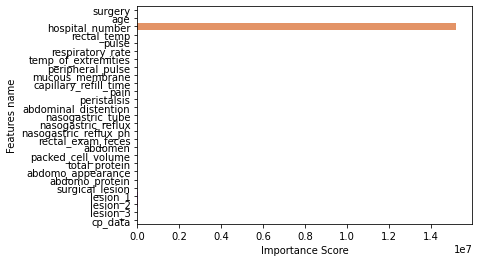

In [11]:
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [12]:
dc = {'Chi2 ranking': X.columns[score.argsort()[::-1]], 'score': np.sort(score)[::-1]}
ranking_chi = pd.DataFrame(data =  dc)
ranking_chi.to_excel("horse_approval_dataset.xlsx",sheet_name='Chi_2')  

In [13]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [14]:
rf.feature_importances_

array([0.018, 0.008, 0.078, 0.056, 0.1  , 0.048, 0.023, 0.022, 0.031,
       0.02 , 0.041, 0.02 , 0.03 , 0.016, 0.017, 0.026, 0.016, 0.017,
       0.114, 0.093, 0.014, 0.035, 0.03 , 0.115, 0.002, 0.   , 0.012])

Text(0.5, 0, 'Feature Importance')

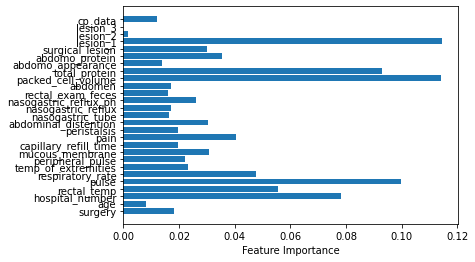

In [15]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [16]:
dc = {'Tree based method Attributes': X.columns[rf.feature_importances_.argsort()[::-1]],'score': np.sort(rf.feature_importances_)[::-1]}
rank_tree = pd.DataFrame(data =  dc) 
from openpyxl import load_workbook
book = load_workbook('/content/horse_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/horse_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_tree.to_excel(writer, "Tree_based_method")
writer.save()

Text(0.5, 0, 'Feature Importance MEAN')

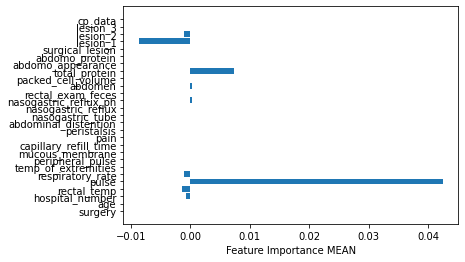

In [17]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

In [18]:
dc = {'Permutation_importance_mean': X.columns[result.importances_mean.argsort()[::-1]],'score': np.sort(result.importances_mean)[::-1]}
rank_per_mean = pd.DataFrame(data =  dc) 
book = load_workbook('/content/horse_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/horse_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_mean.to_excel(writer, "permutation_method_mean")
writer.save()

Text(0.5, 0, 'Feature Importance STD')

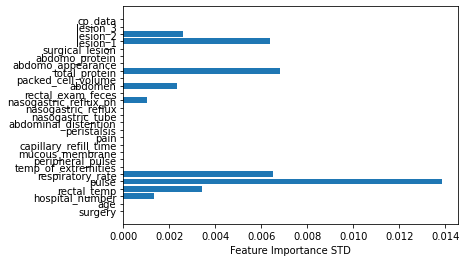

In [19]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

In [20]:
dc = {'Permutation_importance_std': X.columns[result.importances_std.argsort()[::-1]],'score': np.sort(result.importances_std)[::-1]}
rank_per_std = pd.DataFrame(data =  dc) 
book = load_workbook('/content/horse_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/horse_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_std.to_excel(writer, "permutation_method_std")
writer.save()

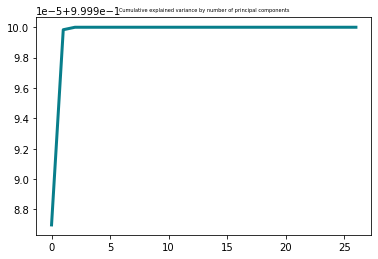

In [21]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [22]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
surgery,7.674296e-02,0.071973,0.039604,0.058987,0.047894,0.020593,0.007277,-1.395613e-01,-1.010128e-01,5.549085e-02,...,1.368101e-01,5.761505e-02,-2.726508e-01,-5.777334e-02,2.151531e-01,-4.515838e-02,5.291858e-03,1.728585e-01,-6.008989e-04,0.000000e+00
age,1.868238e-01,-0.017634,-0.000894,0.071209,0.015916,0.022232,-0.060215,2.851769e-02,-2.379137e-03,3.213085e-04,...,-6.830420e-03,4.445092e-03,1.119818e-02,8.224722e-03,4.772104e-03,9.237064e-03,1.416332e-02,6.826054e-03,1.506136e-01,6.986968e-28
hospital_number,1.500317e+06,-1.601024,0.009470,-0.000191,0.000049,-0.000018,0.000014,-1.844658e-07,3.188762e-07,6.167731e-08,...,3.032111e-08,8.647531e-09,-2.287966e-09,-3.562574e-09,-3.516669e-08,-2.605732e-09,3.722825e-09,-5.917077e-09,-1.361961e-08,-1.610143e-35
rectal_temp,9.989779e-02,0.027123,-0.054227,0.119369,0.002911,0.089678,-0.014080,1.290933e-01,2.301893e-02,3.701668e-02,...,-5.361815e-01,1.228960e-01,-1.724868e-01,-9.586612e-02,-2.975765e-02,-1.279700e-02,3.610414e-02,5.057123e-03,-5.142919e-04,-6.441629e-27
pulse,9.930502e+00,1.256608,-0.469332,25.164435,3.179392,-2.993517,-1.834527,2.056918e-02,4.896130e-03,-7.797284e-03,...,1.290400e-03,1.286808e-03,1.429898e-03,1.595140e-03,1.472203e-03,-7.394286e-04,9.387584e-04,3.345346e-05,-6.112726e-04,8.347464e-29


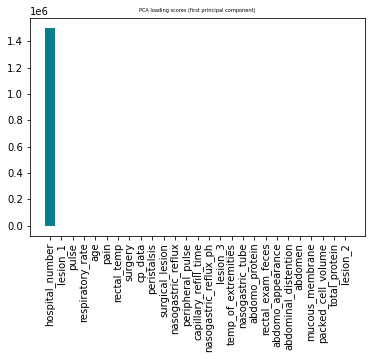

In [23]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
rank_pca = pd.DataFrame(loadings['PC1'])
rank_pca =  rank_pca.sort_values(by='PC1', ascending = False)
book = load_workbook('/content/horse_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/horse_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_pca.to_excel(writer, "PCA")
writer.save()

In [25]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([18,  4, 19, 22,  6,  9, 20, 17, 21, 16,  0, 10,  7, 14,  2, 11, 15,
        1, 26, 12, 23,  5, 13,  8, 24,  3, 25])

In [26]:
best_features_fscore = df.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['packed_cell_volume' 'pulse' 'total_protein' 'outcome'
 'temp_of_extremities' 'capillary_refill_time' 'abdomo_appearance'
 'abdomen' 'abdomo_protein' 'rectal_exam_feces' 'surgery' 'pain'
 'peripheral_pulse' 'nasogastric_reflux' 'hospital_number' 'peristalsis'
 'nasogastric_reflux_ph' 'age' 'lesion_3' 'abdominal_distention'
 'surgical_lesion' 'respiratory_rate' 'nasogastric_tube' 'mucous_membrane'
 'lesion_1' 'rectal_temp' 'lesion_2']
[31.513 22.188 21.806 17.979 14.881 14.701  8.266  7.376  5.629  5.504
  5.303  5.279  4.662  4.652  4.051  3.847  3.71   3.166  2.923  2.467
  2.173  0.934  0.879  0.731  0.725  0.228    nan]


Text(0, 0.5, 'Features')

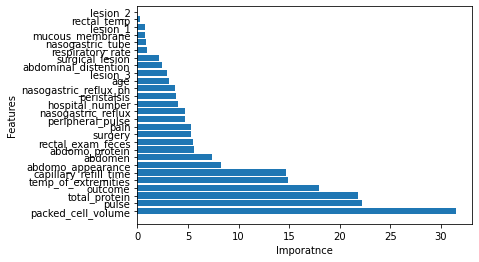

In [27]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [28]:
dc = {'Score': feature_importances_fscore , 'Name': best_features_fscore }
rank_f_test = pd.DataFrame(dc) 
book = load_workbook('/content/horse_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/horse_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_f_test.to_excel(writer, "F_test")
writer.save()

In [29]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['surgical_lesion', 'hospital_number', 'packed_cell_volume', 'pain',
       'mucous_membrane', 'total_protein', 'abdomo_protein', 'pulse',
       'outcome', 'rectal_temp', 'peripheral_pulse', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube',
       'capillary_refill_time', 'respiratory_rate',
       'nasogastric_reflux_ph', 'lesion_3', 'temp_of_extremities',
       'lesion_1', 'surgery', 'lesion_2', 'rectal_exam_feces',
       'nasogastric_reflux', 'abdomen', 'abdomo_appearance', 'age'],
      dtype=object)

In [30]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.273, 0.189, 0.132, 0.106, 0.104, 0.101, 0.091, 0.087, 0.082,
       0.065, 0.057, 0.042, 0.042, 0.039, 0.038, 0.034, 0.034, 0.032,
       0.032, 0.026, 0.011, 0.009, 0.007, 0.   , 0.   , 0.   , 0.   ])

Text(0, 0.5, 'Features')

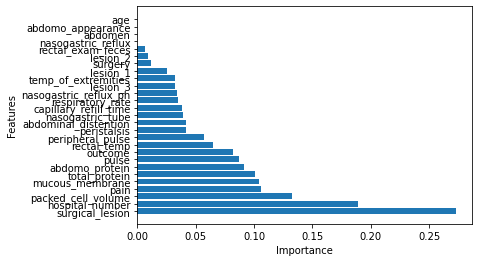

In [31]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [32]:
dc = {'Score':feature_importances_mutual_info, 'Name':best_features_mutual_info }
rank_mutual = pd.DataFrame(dc)
book = load_workbook('/content/horse_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/horse_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_mutual.to_excel(writer, "mutual_info")
writer.save()

In [33]:
df_corr = df.corr()

In [34]:
corr_rank = pd.DataFrame(df_corr['outcome'])
corr_rank = corr_rank.sort_values(by = 'outcome',ascending = False)
corr_rank

,outcome
outcome,1.000000
temp_of_extremities,0.290367
total_protein,0.245657
abdomen,0.214875
rectal_exam_feces,0.193004
nasogastric_reflux,0.181422
peristalsis,0.165844
abdominal_distention,0.112309
lesion_2,0.098993
mucous_membrane,0.056852


In [35]:
book = load_workbook('/content/horse_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/horse_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
corr_rank.to_excel(writer, "Pearson_Correlation")
writer.save()

In [36]:
estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)
index = selector.ranking_.argsort()
X.columns[index]

Index(['hospital_number', 'packed_cell_volume', 'lesion_1', 'total_protein',
       'respiratory_rate', 'rectal_exam_feces', 'pulse', 'rectal_temp',
       'surgical_lesion', 'mucous_membrane', 'abdomen', 'abdominal_distention',
       'pain', 'nasogastric_reflux_ph', 'abdomo_appearance',
       'nasogastric_tube', 'peripheral_pulse', 'capillary_refill_time',
       'temp_of_extremities', 'peristalsis', 'abdomo_protein',
       'nasogastric_reflux', 'lesion_2', 'lesion_3', 'age', 'cp_data',
       'surgery'],
      dtype='object')

In [ ]:
dc = {'Rank_RFE': X.columns[index]}
rank_RFE = pd.DataFrame(data =  dc) 
book = load_workbook('/content/horse_approval_dataset.xlsx')
writer = pd.ExcelWriter('/content/horse_approval_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_RFE.to_excel(writer, "RFE")
writer.save()